In [1]:
pip install tensorflow opencv-python numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import os

# Set data path
data_path = 'dataset'
img_size = 96
batch_size = 32
epochs = 10

# Data preparation
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255,
                             rotation_range=15, zoom_range


Found 23060 images belonging to 7 classes.
Found 5761 images belonging to 7 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


721/721 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3119 - loss: 1.7728

721/721 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.3119 - loss: 1.7726 - val_accuracy: 0.4204 - val_loss: 1.5273
Epoch 2/10
721/721 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4123 - loss: 1.5357

721/721 ━━━━━━━━━━━━━━━━━━━━ 74s 102ms/step - accuracy: 0.4123 - loss: 1.5357 - val_accuracy: 0.4320 - val_loss: 1.4789
Epoch 3/10
721/721 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4331 - loss: 1.4759

721/721 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - accuracy: 0.4331 - loss: 1.4759 - val_accuracy: 0.4447 - val_loss: 1.4583
Epoch 4/10
721/721 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4442 - loss: 1.4373

721/721 ━━━━━━━━━━━━━━━━━━━━ 84s 116ms/step - accuracy: 0.4442 - loss: 1.4373 - val_accuracy: 0.4584 - val_loss: 1.4227
Epoch 5/10
721/721 ━━━━━━━━━━━━━━━━━━━━ 104s 144ms/step - accuracy: 0.4627 - loss: 1.4120 - val_accuracy: 0.4579 - val_loss: 1.4262
Epoch 6/10
721/721 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4713 - loss: 1.3860

721/721 ━━━━━━━━━━━━━━━━━━━━ 88s 122ms/step - accuracy: 0.4713 - loss: 1.3860 - val_accuracy: 0.4589 - val_loss: 1.4171
Epoch 7/10
721/721 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4747 - loss: 1.3761

721/721 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.4747 - loss: 1.3761 - val_accuracy: 0.4595 - val_loss: 1.4182
Epoch 8/10
721/721 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4845 - loss: 1.3552

721/721 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - accuracy: 0.4845 - loss: 1.3552 - val_accuracy: 0.4737 - val_loss: 1.3935
Epoch 9/10
721/721 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4869 - loss: 1.3543

721/721 ━━━━━━━━━━━━━━━━━━━━ 69s 96ms/step - accuracy: 0.4869 - loss: 1.3543 - val_accuracy: 0.4746 - val_loss: 1.3898
Epoch 10/10
721/721 ━━━━━━━━━━━━━━━━━━━━ 64s 89ms/step - accuracy: 0.4933 - loss: 1.3396 - val_accuracy: 0.4701 - val_loss: 1.3933


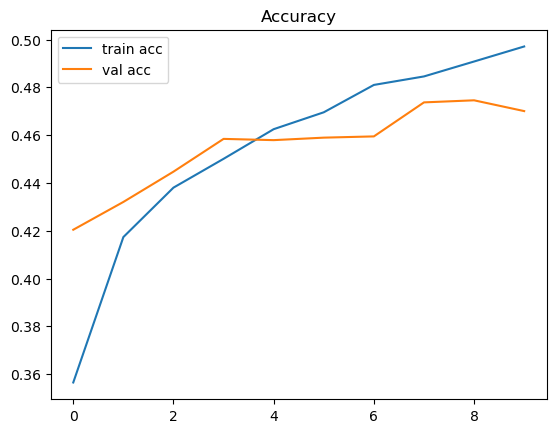

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Path to your dataset
DATASET_DIR = "/Users/srvns/Downloads/images/train"
IMG_SIZE = 96
BATCH_SIZE = 32
EPOCHS = 10

# Load data using ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze base model
base_model.trainable = False

# Add classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Save best model
checkpoint = ModelCheckpoint("expression_model.h5", save_best_only=True, monitor="val_accuracy", mode="max")

# Train
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS, callbacks=[checkpoint])

# Plot training results
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy")
plt.show()


In [3]:
import cv2
import numpy as np
import json
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load trained model
model = load_model("expression_model.h5")

# Load class labels dynamically
with open("class_labels.json", "r") as f:
    class_indices = json.load(f)

classes = [None] * len(class_indices)
for label, index in class_indices.items():
    classes[index] = label

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]

        try:
            face_input = cv2.resize(face, (96, 96))
            face_input = img_to_array(face_input) / 255.0
            face_input = np.expand_dims(face_input, axis=0)

            preds = model.predict(face_input, verbose=0)[0]

            if len(preds) == len(classes):
                label = f"{classes[np.argmax(preds)]} ({np.max(preds)*100:.1f}%)"
            else:
                label = "Unknown"

        except Exception as e:
            print("Prediction Error:", e)
            label = "Error"

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    cv2.imshow('Real-time Expression Detection', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
